In [4]:
pip install pandas scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load the dataset
file_path = 'MovieData.csv'
movie_data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [7]:
print(movie_data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [8]:
# Convert the "Year" and "Votes" columns to numeric
movie_data['Year'] = pd.to_numeric(movie_data['Year'].str.extract(r'(\d{4})', expand=False), errors='coerce')
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'].str.replace(',', ''), errors='coerce')

In [9]:
# Extract numeric values from the "Duration" column
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'].str.extract(r'(\d+)', expand=False), errors='coerce')

In [10]:

# Fill missing values without using inplace=True
movie_data['Year'] = movie_data['Year'].fillna(movie_data['Year'].median())
movie_data['Duration'] = movie_data['Duration'].fillna(movie_data['Duration'].median())
movie_data['Votes'] = movie_data['Votes'].fillna(0)  # Fill missing votes with 0
movie_data['Rating'] = movie_data['Rating'].fillna(movie_data['Rating'].mean())
movie_data['Genre'] = movie_data['Genre'].fillna('Unknown')
movie_data['Director'] = movie_data['Director'].fillna('Unknown')
movie_data['Actor 1'] = movie_data['Actor 1'].fillna('Unknown')
movie_data['Actor 2'] = movie_data['Actor 2'].fillna('Unknown')
movie_data['Actor 3'] = movie_data['Actor 3'].fillna('Unknown')


In [11]:
# One-hot encode categorical features like Genre, Director, and Actors
movie_data = pd.get_dummies(movie_data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [12]:
# Define feature set and target variable
X = movie_data.drop(['Name', 'Rating'], axis=1)
y = movie_data['Rating']


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)


In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [17]:
# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 0.62108308625967
R² Score: 0.3547037017251601


In [18]:
display(mse, r2)

0.62108308625967

0.3547037017251601

In [19]:
import matplotlib.pyplot as plt

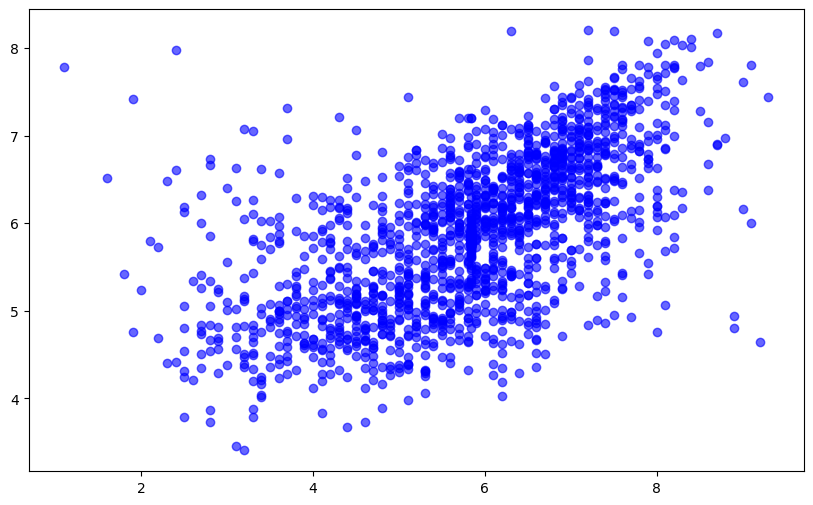

In [20]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)


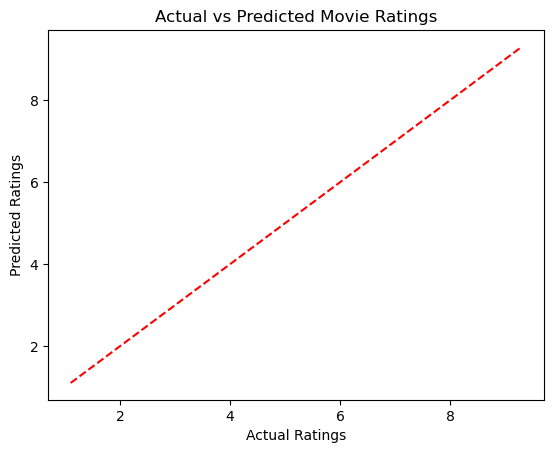

In [27]:
# Plot a diagonal line (perfect prediction line)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction Line')
# Adding labels and title
plt.title('Actual vs Predicted Movie Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
# Display the plot
plt.show()